In [ ]:
# Following will auth and query of combined view from tables

# must have access to the google project to authenticate , check with Jeff for authentication.


In [ ]:
#@title
# Auth and Imports

from google.colab import auth
auth.authenticate_user()
print('Authenticated.')

project_id = 'san-jose-earthquakes-dev'
bigQueryDB = 'san-jose-earthquakes-dev.rustia_test'

from PIL import Image
import datetime
import numpy as np
import json
import math
from pprint import pprint
from google.cloud import bigquery
import pandas as pd
pd.set_option('max_rows', 99999)


client = bigquery.Client(project_id)

Authenticated.


ALL tables in production set below

In [ ]:
dataset_id = 'san-jose-earthquakes-dev.production'

tables = client.list_tables(dataset_id)


print("Tables contained in '{}':".format(dataset_id))
for table in tables:
    print("{}.{}.{}".format(table.project, table.dataset_id, table.table_id))

Tables contained in 'san-jose-earthquakes-dev.production':
san-jose-earthquakes-dev.production.SJ_games
san-jose-earthquakes-dev.production.distinct column counts 
san-jose-earthquakes-dev.production.games
san-jose-earthquakes-dev.production.opta_events
san-jose-earthquakes-dev.production.opta_shots_with_qs 
san-jose-earthquakes-dev.production.players
san-jose-earthquakes-dev.production.qualifiers
san-jose-earthquakes-dev.production.second_spectrum
san-jose-earthquakes-dev.production.second_specturm


In [ ]:
## The newest query is below  has one row for each pass event

#

In [ ]:
import pandas_gbq

## initial call for 140


## add specific qualifier type to not have repreated rows for each event

sql = """
with events as (select gameId, contestantId, game_eventId, opta_event_id,
 playerId, timeStamp as time_Stamp,
PlayerId, playerName, timeMin, periodId, typeId, outcome, x, y
from `san-jose-earthquakes-dev.production.opta_events`),

--  qualifiers as (select
--  qualifier_id, qualifier_type, value, opta_id
--   from `san-jose-earthquakes-dev.production.qualifiers`),

qualifiers as (select A.opta_id as A_id, b.opta_id as B_id ,A.qualifier_id , A.qualifier_type as a_type,
A.value as pass_end_x ,B.qualifier_id as B_id, B.qualifier_type as B_type, B.value as pass_end_y

from `san-jose-earthquakes-dev.production.qualifiers` as A
inner join `san-jose-earthquakes-dev.production.qualifiers` as B
on A.opta_id = B.opta_id
and A.qualifier_type = 140
and B.qualifier_type = 141),

 games as (select description, home_score, away_score, ssid, optaId,optaUuId, from `san-jose-earthquakes-dev.production.games`),

 second as (select optaId,xG,goalDist, shooterDefId,shooterDefDist,numDefGoalside,keeperInitialDist from `san-jose-earthquakes-dev.production.second_specturm`)

select
--  distinct(
     opta_event_id ,
--  xG,
  gameId,playerName,time_Stamp ,timeMin,  typeId, outcome, x,y,
   pass_end_x,pass_end_y
--   qualifier_id, qualifier_type, value,


from events
-- inner join second on events.opta_event_id = optaId
inner join games on events.gameId = games.ssId
inner join qualifiers
on events.opta_event_id = qualifiers.A_id
# join second on events.opta_event_id = second.optaId



Where gameId  IN(
--
  "c0c48f9c-5fef-4202-8f78-b48ddfa9236b"
   #"a5c913c4-12f4-479c-97ca-f6929ebde06e"
   #,"cb5c0012-0cd3-47fc-a721-52207d6335e0","0088c520-6702-4bc3-9dfa-252510ba78f0","1c4aedbe-0c02-44e7-9bcb-4df2bb140c82","3dcbd374-d87a-4407-8118-c8b5973e4f5e"
   #,"48e0dd07-9aa4-48f0-ae52-809f4a89140c","030b1692-e001-4297-876d-901ba37fb183","a75a4348-985f-405c-a19a-f60dcc55146b",
   #"5c9cba2d-7b9e-4c93-939e-e5d0c6506fe8","adae4066-01de-4b1d-a86e-309317621224","6530db04-466b-4f5f-8a00-ebfd9d8c1895","d58d34f9-5228-4dc4-8bf2-d5057037353c",
   #"8faa6f03-722d-43c3-ae2e-bc77e4cb77ff","017c5b80-b49e-4797-8692-16d2bbb8c1b7","efdde752-4605-46fc-828d-b28042731c48","3dcf4f14-1cd4-4d84-acd5-19cb7979e534",
   #"94334cf8-eecb-4547-a3a6-2b58e3ca6f0f","7b426ccf-f58b-4ca7-bb40-9376dc5ec356","df896475-0a8a-4525-9c7d-96f0eff64607","f4422191-4d2f-4445-a60d-e3c7e92e52ce",
   #"893b03cc-1c6e-4899-93af-21fccb22bbb3"

   )


and events.playerName = 'J. Marcinkowski'


order by time_Stamp,opta_event_id
# add other things to
--  ,qualifiers.qualifier_type








"""

print('Loading data (takes about 2-3 mins)...')
df = pandas_gbq.read_gbq(sql,project_id=project_id)

df.info()


Loading data (takes about 2-3 mins)...


Downloading: 100%|██████████| 33/33 [00:00<00:00, 182.99rows/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   opta_event_id  33 non-null     object             
 1   gameId         33 non-null     object             
 2   playerName     33 non-null     object             
 3   time_Stamp     33 non-null     datetime64[ns, UTC]
 4   timeMin        33 non-null     int64              
 5   typeId         33 non-null     int64              
 6   outcome        33 non-null     int64              
 7   x              33 non-null     float64            
 8   y              33 non-null     float64            
 9   pass_end_x     33 non-null     object             
 10  pass_end_y     33 non-null     object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(5)
memory usage: 3.0+ KB


In [ ]:
df.head()

,opta_event_id,gameId,playerName,time_Stamp,timeMin,typeId,outcome,x,y,pass_end_x,pass_end_y
0,2326920191,c0c48f9c-5fef-4202-8f78-b48ddfa9236b,J. Marcinkowski,2021-09-05 02:18:25+00:00,8,1,1,4.6,69.1,12.4,97.4
1,2326920673,c0c48f9c-5fef-4202-8f78-b48ddfa9236b,J. Marcinkowski,2021-09-05 02:19:50+00:00,9,1,0,3.6,55.7,37.3,0.0
2,2326921123,c0c48f9c-5fef-4202-8f78-b48ddfa9236b,J. Marcinkowski,2021-09-05 02:21:19+00:00,11,1,0,4.2,47.8,62.7,63.7
3,2326924105,c0c48f9c-5fef-4202-8f78-b48ddfa9236b,J. Marcinkowski,2021-09-05 02:32:57+00:00,22,1,0,4.8,53.7,52.9,30.1
4,2326924149,c0c48f9c-5fef-4202-8f78-b48ddfa9236b,J. Marcinkowski,2021-09-05 02:33:09+00:00,23,1,1,14.8,33.4,16.2,61.5


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving xT_array - Sheet1.csv to xT_array - Sheet1.csv


In [ ]:
import io
xT = pd.read_csv(io.BytesIO(uploaded['xT_array - Sheet1.csv']))
xT = np.array(xT)
xT_rows, xT_cols = xT.shape

In [ ]:
xT

array([[0.   , 0.001, 0.002, 0.002, 0.001, 0.003, 0.004, 0.003, 0.003,
        0.004, 0.005, 0.005, 0.006, 0.007, 0.007, 0.008, 0.01 , 0.01 ,
        0.009, 0.016, 0.033],
       [0.001, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.004, 0.005,
        0.005, 0.005, 0.005, 0.006, 0.007, 0.008, 0.01 , 0.011, 0.012,
        0.013, 0.017, 0.023],
       [0.002, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.004, 0.005,
        0.006, 0.006, 0.006, 0.006, 0.008, 0.01 , 0.012, 0.014, 0.015,
        0.019, 0.02 , 0.019],
       [0.003, 0.003, 0.003, 0.003, 0.004, 0.004, 0.004, 0.004, 0.006,
        0.006, 0.006, 0.006, 0.007, 0.009, 0.01 , 0.014, 0.018, 0.019,
        0.024, 0.025, 0.022],
       [0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.005, 0.005,
        0.006, 0.006, 0.007, 0.009, 0.01 , 0.011, 0.016, 0.022, 0.025,
        0.03 , 0.033, 0.032],
       [0.003, 0.006, 0.006, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,
        0.006, 0.007, 0.008, 0.009, 0.011, 0.013, 0.017, 0.025, 0.032

In [ ]:
print(xT_rows,xT_cols)

17 21


In [ ]:
df['x'] = df['x'].astype(float)
df['y'] = df['y'].astype(float)
df['pass_end_x'] = df['pass_end_x'].astype(float)
df['pass_end_y'] = df['pass_end_y'].astype(float)

In [ ]:
df['x1_bin'] = pd.cut(df['x'], bins=xT_cols, labels=False)
df['y1_bin'] = pd.cut(df['y'], bins=xT_rows, labels=False)
df['x2_bin'] = pd.cut(df['pass_end_x'], bins=xT_cols, labels=False)
df['y2_bin'] = pd.cut(df['pass_end_y'], bins=xT_rows, labels=False)

In [ ]:
df.head()

,opta_event_id,gameId,playerName,time_Stamp,timeMin,typeId,outcome,x,y,pass_end_x,pass_end_y,x1_bin,y1_bin,x2_bin,y2_bin
0,2326920191,c0c48f9c-5fef-4202-8f78-b48ddfa9236b,J. Marcinkowski,2021-09-05 02:18:25+00:00,8,1,1,4.6,69.1,12.4,97.4,2,12,0,16
1,2326920673,c0c48f9c-5fef-4202-8f78-b48ddfa9236b,J. Marcinkowski,2021-09-05 02:19:50+00:00,9,1,0,3.6,55.7,37.3,0.0,1,9,8,0
2,2326921123,c0c48f9c-5fef-4202-8f78-b48ddfa9236b,J. Marcinkowski,2021-09-05 02:21:19+00:00,11,1,0,4.2,47.8,62.7,63.7,1,7,17,10
3,2326924105,c0c48f9c-5fef-4202-8f78-b48ddfa9236b,J. Marcinkowski,2021-09-05 02:32:57+00:00,22,1,0,4.8,53.7,52.9,30.1,2,8,14,5
4,2326924149,c0c48f9c-5fef-4202-8f78-b48ddfa9236b,J. Marcinkowski,2021-09-05 02:33:09+00:00,23,1,1,14.8,33.4,16.2,61.5,9,4,1,10


In [ ]:
df['start_zone_value'] = df[['x1_bin', 'y1_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)
df['end_zone_value'] = df[['x2_bin', 'y2_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)

In [ ]:
df.head()

,opta_event_id,gameId,playerName,time_Stamp,timeMin,typeId,outcome,x,y,pass_end_x,pass_end_y,x1_bin,y1_bin,x2_bin,y2_bin,start_zone_value,end_zone_value
0,2326920191,c0c48f9c-5fef-4202-8f78-b48ddfa9236b,J. Marcinkowski,2021-09-05 02:18:25+00:00,8,1,1,4.6,69.1,12.4,97.4,2,12,0,16,0.004,0.000
1,2326920673,c0c48f9c-5fef-4202-8f78-b48ddfa9236b,J. Marcinkowski,2021-09-05 02:19:50+00:00,9,1,0,3.6,55.7,37.3,0.0,1,9,8,0,0.012,0.003
2,2326921123,c0c48f9c-5fef-4202-8f78-b48ddfa9236b,J. Marcinkowski,2021-09-05 02:21:19+00:00,11,1,0,4.2,47.8,62.7,63.7,1,7,17,10,0.012,0.040
3,2326924105,c0c48f9c-5fef-4202-8f78-b48ddfa9236b,J. Marcinkowski,2021-09-05 02:32:57+00:00,22,1,0,4.8,53.7,52.9,30.1,2,8,14,5,0.008,0.013
4,2326924149,c0c48f9c-5fef-4202-8f78-b48ddfa9236b,J. Marcinkowski,2021-09-05 02:33:09+00:00,23,1,1,14.8,33.4,16.2,61.5,9,4,1,10,0.006,0.006


In [ ]:
df['xT'] = df['end_zone_value'] - df['start_zone_value']

In [ ]:
df.head()

,opta_event_id,gameId,playerName,time_Stamp,timeMin,typeId,outcome,x,y,pass_end_x,pass_end_y,x1_bin,y1_bin,x2_bin,y2_bin,start_zone_value,end_zone_value,xT
0,2326920191,c0c48f9c-5fef-4202-8f78-b48ddfa9236b,J. Marcinkowski,2021-09-05 02:18:25+00:00,8,1,1,4.6,69.1,12.4,97.4,2,12,0,16,0.004,0.000,-0.004
1,2326920673,c0c48f9c-5fef-4202-8f78-b48ddfa9236b,J. Marcinkowski,2021-09-05 02:19:50+00:00,9,1,0,3.6,55.7,37.3,0.0,1,9,8,0,0.012,0.003,-0.009
2,2326921123,c0c48f9c-5fef-4202-8f78-b48ddfa9236b,J. Marcinkowski,2021-09-05 02:21:19+00:00,11,1,0,4.2,47.8,62.7,63.7,1,7,17,10,0.012,0.040,0.028
3,2326924105,c0c48f9c-5fef-4202-8f78-b48ddfa9236b,J. Marcinkowski,2021-09-05 02:32:57+00:00,22,1,0,4.8,53.7,52.9,30.1,2,8,14,5,0.008,0.013,0.005
4,2326924149,c0c48f9c-5fef-4202-8f78-b48ddfa9236b,J. Marcinkowski,2021-09-05 02:33:09+00:00,23,1,1,14.8,33.4,16.2,61.5,9,4,1,10,0.006,0.006,0.000


In [ ]:
df = df[df['typeId']==1]

In [ ]:
df = df[df['outcome']==1].reset_index()

In [ ]:
df.head()

,index,opta_event_id,gameId,playerName,time_Stamp,timeMin,typeId,outcome,x,y,pass_end_x,pass_end_y,x1_bin,y1_bin,x2_bin,y2_bin,start_zone_value,end_zone_value,xT
0,0,2326920191,c0c48f9c-5fef-4202-8f78-b48ddfa9236b,J. Marcinkowski,2021-09-05 02:18:25+00:00,8,1,1,4.6,69.1,12.4,97.4,2,12,0,16,0.004,0.000,-0.004
1,4,2326924149,c0c48f9c-5fef-4202-8f78-b48ddfa9236b,J. Marcinkowski,2021-09-05 02:33:09+00:00,23,1,1,14.8,33.4,16.2,61.5,9,4,1,10,0.006,0.006,0.000
2,5,2326924513,c0c48f9c-5fef-4202-8f78-b48ddfa9236b,J. Marcinkowski,2021-09-05 02:34:33+00:00,24,1,1,18.3,50.0,59.0,84.8,12,8,16,14,0.010,0.014,0.004
3,6,2326924807,c0c48f9c-5fef-4202-8f78-b48ddfa9236b,J. Marcinkowski,2021-09-05 02:36:13+00:00,26,1,1,14.1,46.7,26.8,14.7,9,7,5,2,0.006,0.003,-0.003
4,8,2326926061,c0c48f9c-5fef-4202-8f78-b48ddfa9236b,J. Marcinkowski,2021-09-05 02:44:01+00:00,33,1,1,4.6,50.0,10.4,36.7,2,8,0,6,0.008,0.005,-0.003


In [ ]:
TotalxT = df['xT'].sum()
print (TotalxT)

0.015


In [ ]:
df['outcome'].value_counts()

1    25
0     4
Name: outcome, dtype: int64

In [ ]:
import datetime
days = df['time_Stamp'].dt.day

In [ ]:
days.unique()

array([ 8,  9, 14, 18, 21])

In [ ]:
df.head()

,opta_event_id,gameId,playerName,typeId,outcome,x,y,qualifier_id,qualifier_type,value,time_Stamp
0,2317116653,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,E. López,1,1,50.1,50.3,569850695,140,46.0,2021-08-08 23:09:01+00:00
1,2317116655,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,J. Yueill,1,1,46.4,45.0,569850649,140,54.7,2021-08-08 23:09:04+00:00
2,2317116663,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,C. Espinoza,1,1,54.4,18.0,569543202,140,34.3,2021-08-08 23:09:07+00:00
3,2317116675,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,L. Abecasis,1,1,28.0,5.6,568659337,140,20.8,2021-08-08 23:09:08+00:00
4,2317116687,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,Nathan,1,1,21.2,24.7,568659378,140,19.3,2021-08-08 23:09:11+00:00


In [ ]:
df.head()

,opta_event_id,gameId,playerName,typeId,outcome,x,y,qualifier_id,qualifier_type,value,time_Stamp
0,2317116653,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,E. López,1,1,50.1,50.3,569850695,140,46.0,2021-08-08 23:09:01+00:00
1,2317116655,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,J. Yueill,1,1,46.4,45.0,569850649,140,54.7,2021-08-08 23:09:04+00:00
2,2317116663,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,C. Espinoza,1,1,54.4,18.0,569543202,140,34.3,2021-08-08 23:09:07+00:00
3,2317116675,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,L. Abecasis,1,1,28.0,5.6,568659337,140,20.8,2021-08-08 23:09:08+00:00
4,2317116687,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,Nathan,1,1,21.2,24.7,568659378,140,19.3,2021-08-08 23:09:11+00:00


In [ ]:
df['endx'] = df['value']
df.drop('value', axis = 1 ,inplace= True)
df.head(2)

,opta_event_id,gameId,playerName,typeId,outcome,x,y,qualifier_id,qualifier_type,time_Stamp,endx
0,2317116653,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,E. López,1,1,50.1,50.3,569850695,140,2021-08-08 23:09:01+00:00,46.0
1,2317116655,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,J. Yueill,1,1,46.4,45.0,569850649,140,2021-08-08 23:09:04+00:00,54.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3868 entries, 0 to 3867
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   opta_event_id   3868 non-null   object             
 1   gameId          3868 non-null   object             
 2   playerName      3868 non-null   object             
 3   typeId          3868 non-null   int64              
 4   outcome         3868 non-null   int64              
 5   x               3868 non-null   float64            
 6   y               3868 non-null   float64            
 7   qualifier_id    3868 non-null   int64              
 8   qualifier_type  3868 non-null   int64              
 9   time_Stamp      3868 non-null   datetime64[ns, UTC]
 10  endx            3868 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(4), object(4)
memory usage: 332.5+ KB


In [ ]:
import pandas_gbq
# second call for 141
sql = """
with events as (select gameId, contestantId, game_eventId, opta_event_id,
 playerId, timeStamp as time_Stamp,
PlayerId, playerName, timeMin, periodId, typeId, outcome, x, y
from `san-jose-earthquakes-dev.production.opta_events`),

 qualifiers as (select
 qualifier_id, qualifier_type, value, opta_id
  from `san-jose-earthquakes-dev.production.qualifiers`),

 games as (select description, home_score, away_score, ssid, optaId,optaUuId, from `san-jose-earthquakes-dev.production.games`),

 second as (select optaId,xG,goalDist, shooterDefId,shooterDefDist,numDefGoalside,keeperInitialDist from `san-jose-earthquakes-dev.production.second_specturm`)

select
 distinct( opta_event_id) ,gameId,playerName,  typeId, outcome, x,y,qualifier_id, qualifier_type, value, time_Stamp
from events
inner join games on events.gameId = games.ssId
inner join qualifiers
on events.opta_event_id = qualifiers.opta_id
# join second on events.opta_event_id = second.optaId

Where gameId  IN(
   "1c4aedbe-0c02-44e7-9bcb-4df2bb140c82","0088c520-6702-4bc3-9dfa-252510ba78f0","cb5c0012-0cd3-47fc-a721-52207d6335e0","a5c913c4-12f4-479c-97ca-f6929ebde06e")
 and qualifiers.qualifier_type = 141

#Where events.playerName = 'J. Ebobisse'
#and qualifiers.qualifier_type = 141


#and events.playerName = 'J. Ebobisse'
 #and gameId  IN(
#"9f532505-44ab-4f07-992f-e21c5816f09a","588b6bad-9a5b-40db-8e7d-efd4ff7eddda",
 #"783e2753-9bba-4e89-acee-f93b0e636e92","1ee36d3b-3e81-4b93-bbcd-6084deb60a32",
 #"2847340d-c199-4c15-90f5-03f525034539","d252d778-dfab-4c53-95d1-3ac93452db9a",
 #"f4901bd1-4e91-4d52-ab62-7de7e97f6739")

 #IN(
 #"3dcf4f14-1cd4-4d84-acd5-19cb7979e534","9c354c4c-8be9-44b2-aab1-d4a7b14b5a7d",
  #"fc1d12d3-b311-4afc-a2c4-99a0b0a190a9","e7c34023-11a1-44d2-9dd1-4de8739d9c36",
  #"9b247929-c87d-4f8f-a19e-6385f33f6fc7")

 #IN(
#"9f532505-44ab-4f07-992f-e21c5816f09a","588b6bad-9a5b-40db-8e7d-efd4ff7eddda",
 #"783e2753-9bba-4e89-acee-f93b0e636e92","1ee36d3b-3e81-4b93-bbcd-6084deb60a32",
 #"2847340d-c199-4c15-90f5-03f525034539","9b247929-c87d-4f8f-a19e-6385f33f6fc7",
 #"d252d778-dfab-4c53-95d1-3ac93452db9a","f4901bd1-4e91-4d52-ab62-7de7e97f6739")

order by time_Stamp


"""

print('Loading data (takes about 2-3 mins)...')
df_onefoursix = pandas_gbq.read_gbq(sql,project_id=project_id)

df_onefoursix.info()

Loading data (takes about 2-3 mins)...


Downloading: 100%|██████████| 3868/3868 [00:00<00:00, 5475.78rows/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3868 entries, 0 to 3867
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   opta_event_id   3868 non-null   object             
 1   gameId          3868 non-null   object             
 2   playerName      3868 non-null   object             
 3   typeId          3868 non-null   int64              
 4   outcome         3868 non-null   int64              
 5   x               3868 non-null   float64            
 6   y               3868 non-null   float64            
 7   qualifier_id    3868 non-null   int64              
 8   qualifier_type  3868 non-null   int64              
 9   value           3868 non-null   object             
 10  time_Stamp      3868 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(2), int64(4), object(4)
memory usage: 332.5+ KB


In [ ]:
df_onefoursix.head(2)

,opta_event_id,gameId,playerName,typeId,outcome,x,y,qualifier_id,qualifier_type,value,time_Stamp
0,2317116653,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,E. López,1,1,50.1,50.3,569850691,141,56.1,2021-08-08 23:09:01+00:00
1,2317116655,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,J. Yueill,1,1,46.4,45.0,569850650,141,14.7,2021-08-08 23:09:04+00:00


In [ ]:
df['endy'] = df_onefoursix['value']
df.head(4)

,opta_event_id,gameId,playerName,typeId,outcome,x,y,qualifier_id,qualifier_type,time_Stamp,endx,endy
0,2317116653,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,E. López,1,1,50.1,50.3,569850695,140,2021-08-08 23:09:01+00:00,46.0,56.1
1,2317116655,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,J. Yueill,1,1,46.4,45.0,569850649,140,2021-08-08 23:09:04+00:00,54.7,14.7
2,2317116663,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,C. Espinoza,1,1,54.4,18.0,569543202,140,2021-08-08 23:09:07+00:00,34.3,6.4
3,2317116675,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,L. Abecasis,1,1,28.0,5.6,568659337,140,2021-08-08 23:09:08+00:00,20.8,23.4


In [ ]:
df.head()

,opta_event_id,gameId,playerName,typeId,outcome,x,y,qualifier_id,qualifier_type,time_Stamp,endx,endy
0,2317116653,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,E. López,1,1,50.1,50.3,569850695,140,2021-08-08 23:09:01+00:00,46.0,56.1
1,2317116655,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,J. Yueill,1,1,46.4,45.0,569850649,140,2021-08-08 23:09:04+00:00,54.7,14.7
2,2317116663,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,C. Espinoza,1,1,54.4,18.0,569543202,140,2021-08-08 23:09:07+00:00,34.3,6.4
3,2317116675,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,L. Abecasis,1,1,28.0,5.6,568659337,140,2021-08-08 23:09:08+00:00,20.8,23.4
4,2317116687,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,Nathan,1,1,21.2,24.7,568659378,140,2021-08-08 23:09:11+00:00,19.3,48.8


In [ ]:
import pandas_gbq

## initial call for shots


## add specific qualifier type to not have repreated rows for each event

sql = """
with events as (select gameId, contestantId, game_eventId, opta_event_id,
 playerId, timeStamp as time_Stamp,
PlayerId, playerName, timeMin, periodId, typeId, outcome, x, y
from `san-jose-earthquakes-dev.production.opta_events`),

 qualifiers as (select
 qualifier_id, qualifier_type, value, opta_id
  from `san-jose-earthquakes-dev.production.qualifiers`),

 games as (select description, home_score, away_score, ssid, optaId,optaUuId, from `san-jose-earthquakes-dev.production.games`),

 second as (select optaId,xG,goalDist, shooterDefId,shooterDefDist,numDefGoalside,keeperInitialDist from `san-jose-earthquakes-dev.production.second_specturm`)

select
 distinct( opta_event_id) ,gameId,playerName,  typeId, outcome, x,y,qualifier_id, qualifier_type, value, time_Stamp
from events
inner join games on events.gameId = games.ssId
inner join qualifiers
on events.opta_event_id = qualifiers.opta_id
# join second on events.opta_event_id = second.optaId


Where gameId  IN(
   "1c4aedbe-0c02-44e7-9bcb-4df2bb140c82","0088c520-6702-4bc3-9dfa-252510ba78f0","cb5c0012-0cd3-47fc-a721-52207d6335e0","a5c913c4-12f4-479c-97ca-f6929ebde06e")
#and qualifiers.qualifier_type = 16
and typeId in unnest([13,14,15,16])
and events.playerName = 'J. Ebobisse'



#Where events.playerName = 'J. Ebobisse'
#and qualifiers.qualifier_type = 140


#and events.playerName = 'J. Ebobisse'
 #and gameId  IN(
#"9f532505-44ab-4f07-992f-e21c5816f09a","588b6bad-9a5b-40db-8e7d-efd4ff7eddda",
 #"783e2753-9bba-4e89-acee-f93b0e636e92","1ee36d3b-3e81-4b93-bbcd-6084deb60a32",
 #"2847340d-c199-4c15-90f5-03f525034539","d252d778-dfab-4c53-95d1-3ac93452db9a",
 #"f4901bd1-4e91-4d52-ab62-7de7e97f6739")

 #IN(
 #"3dcf4f14-1cd4-4d84-acd5-19cb7979e534","9c354c4c-8be9-44b2-aab1-d4a7b14b5a7d",
  #"fc1d12d3-b311-4afc-a2c4-99a0b0a190a9","e7c34023-11a1-44d2-9dd1-4de8739d9c36",
  #"9b247929-c87d-4f8f-a19e-6385f33f6fc7")

 #IN(
#"9f532505-44ab-4f07-992f-e21c5816f09a","588b6bad-9a5b-40db-8e7d-efd4ff7eddda",
 #"783e2753-9bba-4e89-acee-f93b0e636e92","1ee36d3b-3e81-4b93-bbcd-6084deb60a32",
 #"2847340d-c199-4c15-90f5-03f525034539","9b247929-c87d-4f8f-a19e-6385f33f6fc7",
 #"d252d778-dfab-4c53-95d1-3ac93452db9a","f4901bd1-4e91-4d52-ab62-7de7e97f6739")

order by time_Stamp

"""

print('Loading data (takes about 2-3 mins)...')
df_shots = pandas_gbq.read_gbq(sql,project_id=project_id)

df_shots.info()

Loading data (takes about 2-3 mins)...


Downloading: 100%|██████████| 200/200 [00:00<00:00, 977.52rows/s] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   opta_event_id   200 non-null    object             
 1   gameId          200 non-null    object             
 2   playerName      200 non-null    object             
 3   typeId          200 non-null    int64              
 4   outcome         200 non-null    int64              
 5   x               200 non-null    float64            
 6   y               200 non-null    float64            
 7   qualifier_id    200 non-null    int64              
 8   qualifier_type  200 non-null    int64              
 9   value           200 non-null    object             
 10  time_Stamp      200 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(2), int64(4), object(4)
memory usage: 17.3+ KB


In [ ]:
df_shots

,opta_event_id,gameId,playerName,typeId,outcome,x,y,qualifier_id,qualifier_type,value,time_Stamp
0,2317140291,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,J. Ebobisse,15,1,67.4,42.3,569768040,56,Center,2021-08-09 00:19:27+00:00
1,2317140291,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,J. Ebobisse,15,1,67.4,42.3,569768037,327,2,2021-08-09 00:19:27+00:00
2,2317140291,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,J. Ebobisse,15,1,67.4,42.3,569768023,321,0.0234,2021-08-09 00:19:27+00:00
3,2317140291,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,J. Ebobisse,15,1,67.4,42.3,569768024,102,50.038197,2021-08-09 00:19:27+00:00
4,2317140291,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,J. Ebobisse,15,1,67.4,42.3,569768027,55,480,2021-08-09 00:19:27+00:00
5,2317140291,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,J. Ebobisse,15,1,67.4,42.3,569768035,368,1p0gpob8uvslmb8m1rlq2bcux,2021-08-09 00:19:27+00:00
6,2317140291,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,J. Ebobisse,15,1,67.4,42.3,569768039,146,97.58654,2021-08-09 00:19:27+00:00
7,2317140291,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,J. Ebobisse,15,1,67.4,42.3,569768031,215,NULL,2021-08-09 00:19:27+00:00
8,2317140291,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,J. Ebobisse,15,1,67.4,42.3,569768025,322,0.0112,2021-08-09 00:19:27+00:00
9,2317140291,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,J. Ebobisse,15,1,67.4,42.3,569768034,142,NULL,2021-08-09 00:19:27+00:00


In [ ]:
df_final = pd.concat([df, df_shots])

In [ ]:
df_final

,opta_event_id,gameId,playerName,typeId,outcome,x,y,qualifier_id,qualifier_type,time_Stamp,endx,endy,value
0,2317116653,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,E. López,1,1,50.1,50.3,569850695,140,2021-08-08 23:09:01+00:00,46.0,56.1,NaN
1,2317116655,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,J. Yueill,1,1,46.4,45.0,569850649,140,2021-08-08 23:09:04+00:00,54.7,14.7,NaN
2,2317116663,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,C. Espinoza,1,1,54.4,18.0,569543202,140,2021-08-08 23:09:07+00:00,34.3,6.4,NaN
3,2317116675,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,L. Abecasis,1,1,28.0,5.6,568659337,140,2021-08-08 23:09:08+00:00,20.8,23.4,NaN
4,2317116687,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,Nathan,1,1,21.2,24.7,568659378,140,2021-08-08 23:09:11+00:00,19.3,48.8,NaN
5,2317116697,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,O. Alanís,1,1,21.2,53.3,568659459,140,2021-08-08 23:09:16+00:00,21.4,28.0,NaN
6,2317116711,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,Nathan,1,1,21.3,29.7,568659648,140,2021-08-08 23:09:20+00:00,19.6,51.9,NaN
7,2317116725,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,O. Alanís,1,1,21.9,54.6,568659596,140,2021-08-08 23:09:23+00:00,25.2,77.6,NaN
8,2317116735,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,T. Beason,1,1,24.8,79.0,568659817,140,2021-08-08 23:09:26+00:00,20.5,67.0,NaN
9,2317116777,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,O. Alanís,1,1,20.5,67.0,568659921,140,2021-08-08 23:09:28+00:00,6.1,61.1,NaN


In [ ]:
df_complete = df_final.sort_values(["time_Stamp",], ascending=True)

In [ ]:
df_complete.head()

,opta_event_id,gameId,playerName,typeId,outcome,x,y,qualifier_id,qualifier_type,time_Stamp,endx,endy,value
0,2317116653,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,E. López,1,1,50.1,50.3,569850695,140,2021-08-08 23:09:01+00:00,46.0,56.1,NaN
1,2317116655,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,J. Yueill,1,1,46.4,45.0,569850649,140,2021-08-08 23:09:04+00:00,54.7,14.7,NaN
2,2317116663,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,C. Espinoza,1,1,54.4,18.0,569543202,140,2021-08-08 23:09:07+00:00,34.3,6.4,NaN
3,2317116675,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,L. Abecasis,1,1,28.0,5.6,568659337,140,2021-08-08 23:09:08+00:00,20.8,23.4,NaN
4,2317116687,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,Nathan,1,1,21.2,24.7,568659378,140,2021-08-08 23:09:11+00:00,19.3,48.8,NaN


In [ ]:
df_complete['Receiver'] = df_complete['playerName'].shift(-1)

In [ ]:
df_complete.head(10)

,opta_event_id,gameId,playerName,typeId,outcome,x,y,qualifier_id,qualifier_type,time_Stamp,endx,endy,value,Receiver
0,2317116653,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,E. López,1,1,50.1,50.3,569850695,140,2021-08-08 23:09:01+00:00,46.0,56.1,NaN,J. Yueill
1,2317116655,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,J. Yueill,1,1,46.4,45.0,569850649,140,2021-08-08 23:09:04+00:00,54.7,14.7,NaN,C. Espinoza
2,2317116663,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,C. Espinoza,1,1,54.4,18.0,569543202,140,2021-08-08 23:09:07+00:00,34.3,6.4,NaN,L. Abecasis
3,2317116675,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,L. Abecasis,1,1,28.0,5.6,568659337,140,2021-08-08 23:09:08+00:00,20.8,23.4,NaN,Nathan
4,2317116687,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,Nathan,1,1,21.2,24.7,568659378,140,2021-08-08 23:09:11+00:00,19.3,48.8,NaN,O. Alanís
5,2317116697,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,O. Alanís,1,1,21.2,53.3,568659459,140,2021-08-08 23:09:16+00:00,21.4,28.0,NaN,Nathan
6,2317116711,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,Nathan,1,1,21.3,29.7,568659648,140,2021-08-08 23:09:20+00:00,19.6,51.9,NaN,O. Alanís
7,2317116725,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,O. Alanís,1,1,21.9,54.6,568659596,140,2021-08-08 23:09:23+00:00,25.2,77.6,NaN,T. Beason
8,2317116735,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,T. Beason,1,1,24.8,79.0,568659817,140,2021-08-08 23:09:26+00:00,20.5,67.0,NaN,O. Alanís
9,2317116777,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,O. Alanís,1,1,20.5,67.0,568659921,140,2021-08-08 23:09:28+00:00,6.1,61.1,NaN,J. Marcinkowski


In [ ]:
df_complete = df_complete[df_complete['typeId']==1]

In [ ]:
df_pass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2729 entries, 0 to 2841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   opta_event_id   2729 non-null   object             
 1   gameId          2729 non-null   object             
 2   playerName      2729 non-null   object             
 3   typeId          2729 non-null   int64              
 4   outcome         2729 non-null   int64              
 5   x               2729 non-null   float64            
 6   y               2729 non-null   float64            
 7   qualifier_id    2729 non-null   int64              
 8   qualifier_type  2729 non-null   int64              
 9   time_Stamp      2729 non-null   datetime64[ns, UTC]
 10  endx            2729 non-null   object             
 11  endy            2729 non-null   object             
 12  Receiver        2729 non-null   object             
dtypes: datetime64[ns, UTC](1), float6

In [ ]:
df_complete = df_complete[df_complete['outcome']==1]

In [ ]:
df_complete.head()

,opta_event_id,gameId,playerName,typeId,outcome,x,y,qualifier_id,qualifier_type,time_Stamp,endx,endy,value,Receiver
0,2317116653,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,E. López,1,1,50.1,50.3,569850695,140,2021-08-08 23:09:01+00:00,46.0,56.1,NaN,J. Yueill
1,2317116655,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,J. Yueill,1,1,46.4,45.0,569850649,140,2021-08-08 23:09:04+00:00,54.7,14.7,NaN,C. Espinoza
2,2317116663,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,C. Espinoza,1,1,54.4,18.0,569543202,140,2021-08-08 23:09:07+00:00,34.3,6.4,NaN,L. Abecasis
3,2317116675,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,L. Abecasis,1,1,28.0,5.6,568659337,140,2021-08-08 23:09:08+00:00,20.8,23.4,NaN,Nathan
4,2317116687,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,Nathan,1,1,21.2,24.7,568659378,140,2021-08-08 23:09:11+00:00,19.3,48.8,NaN,O. Alanís


In [ ]:
df_complete = df_complete[df_complete['Receiver']=='J. Ebobisse']

In [ ]:
df_complete.head(10)

,opta_event_id,gameId,playerName,typeId,outcome,x,y,qualifier_id,qualifier_type,time_Stamp,endx,endy,value,Receiver
348,2317130003,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,S. Salinas,1,1,52.5,10.6,569720630,140,2021-08-08 23:45:20+00:00,61.3,19.8,NaN,J. Ebobisse
364,2317134483,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,E. López,1,1,55.0,29.5,568748749,140,2021-08-08 23:46:28+00:00,68.8,24.3,NaN,J. Ebobisse
376,2317133867,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,O. Alanís,1,1,29.8,85.5,569727098,140,2021-08-08 23:49:00+00:00,52.4,71.5,NaN,J. Ebobisse
399,2317132089,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,C. Espinoza,1,1,26.4,29.2,568734624,140,2021-08-08 23:50:35+00:00,61.2,11.7,NaN,J. Ebobisse
466,2317139029,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,S. Salinas,1,1,65.2,95.6,569760589,140,2021-08-09 00:13:55+00:00,68.2,84.1,NaN,J. Ebobisse
545,2317140289,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,E. López,1,1,73.0,27.9,569768009,140,2021-08-09 00:19:24+00:00,66.1,28.5,NaN,J. Ebobisse
561,2317140781,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,E. López,1,1,40.6,17.1,568786476,140,2021-08-09 00:21:07+00:00,60.6,27.7,NaN,J. Ebobisse
583,2317141071,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,T. Beason,1,1,60.0,89.4,569781571,140,2021-08-09 00:22:08+00:00,75.9,77.3,NaN,J. Ebobisse
628,2317142113,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,Nathan,1,1,33.0,28.0,568794361,140,2021-08-09 00:26:01+00:00,84.2,81.7,NaN,J. Ebobisse
662,2317143207,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,E. López,1,1,35.8,20.6,568800268,140,2021-08-09 00:30:19+00:00,54.0,30.6,NaN,J. Ebobisse


In [ ]:
df_pass_comp.tail()

,index,opta_event_id,gameId,playerName,typeId,outcome,x,y,qualifier_id,qualifier_type,time_Stamp,endx,endy,Receiver
2123,2834,2320261279,cb5c0012-0cd3-47fc-a721-52207d6335e0,D. Taylor,1,1,23.3,89.6,587041505,140,2021-08-18 04:34:42+00:00,60.2,79.0,J. Agudelo
2124,2835,2320261291,cb5c0012-0cd3-47fc-a721-52207d6335e0,J. Agudelo,1,1,60.2,78.2,587041596,140,2021-08-18 04:34:45+00:00,66.3,55.4,J. McMaster
2125,2836,2320261301,cb5c0012-0cd3-47fc-a721-52207d6335e0,J. McMaster,1,1,67.6,30.4,587041724,140,2021-08-18 04:34:50+00:00,91.2,5.9,R. Métanire
2126,2839,2320261351,cb5c0012-0cd3-47fc-a721-52207d6335e0,J. Yueill,1,1,23.4,67.4,587042038,140,2021-08-18 04:35:08+00:00,30.7,87.6,M. López
2127,2840,2320261359,cb5c0012-0cd3-47fc-a721-52207d6335e0,M. López,1,1,30.7,87.6,587042086,140,2021-08-18 04:35:11+00:00,66.7,18.7,C. Fierro


In [ ]:
df_pass_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   index           2128 non-null   int64              
 1   opta_event_id   2128 non-null   object             
 2   gameId          2128 non-null   object             
 3   playerName      2128 non-null   object             
 4   typeId          2128 non-null   int64              
 5   outcome         2128 non-null   int64              
 6   x               2128 non-null   float64            
 7   y               2128 non-null   float64            
 8   qualifier_id    2128 non-null   int64              
 9   qualifier_type  2128 non-null   int64              
 10  time_Stamp      2128 non-null   datetime64[ns, UTC]
 11  endx            2128 non-null   object             
 12  endy            2128 non-null   object             
 13  Receiver        2128 non-null   o

In [ ]:
df_complete['x'] = df_complete['x'].astype(float)
df_complete['y'] = df_complete['y'].astype(float)
df_complete['endx'] = df_complete['endx'].astype(float)
df_complete['endy'] = df_complete['endy'].astype(float)

In [ ]:
df_complete['x'] = df_complete['x']*1.2
df_complete['y'] = df_complete['y']*0.8
df_complete['endx'] = df_complete['endx']*1.2
df_complete['endy'] = df_complete['endy']*0.8

In [ ]:
df_complete

,opta_event_id,gameId,playerName,typeId,outcome,x,y,qualifier_id,qualifier_type,time_Stamp,endx,endy,value,Receiver
348,2317130003,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,S. Salinas,1,1,63.00,8.48,569720630,140,2021-08-08 23:45:20+00:00,73.56,15.84,NaN,J. Ebobisse
364,2317134483,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,E. López,1,1,66.00,23.60,568748749,140,2021-08-08 23:46:28+00:00,82.56,19.44,NaN,J. Ebobisse
376,2317133867,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,O. Alanís,1,1,35.76,68.40,569727098,140,2021-08-08 23:49:00+00:00,62.88,57.20,NaN,J. Ebobisse
399,2317132089,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,C. Espinoza,1,1,31.68,23.36,568734624,140,2021-08-08 23:50:35+00:00,73.44,9.36,NaN,J. Ebobisse
466,2317139029,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,S. Salinas,1,1,78.24,76.48,569760589,140,2021-08-09 00:13:55+00:00,81.84,67.28,NaN,J. Ebobisse
545,2317140289,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,E. López,1,1,87.60,22.32,569768009,140,2021-08-09 00:19:24+00:00,79.32,22.80,NaN,J. Ebobisse
561,2317140781,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,E. López,1,1,48.72,13.68,568786476,140,2021-08-09 00:21:07+00:00,72.72,22.16,NaN,J. Ebobisse
583,2317141071,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,T. Beason,1,1,72.00,71.52,569781571,140,2021-08-09 00:22:08+00:00,91.08,61.84,NaN,J. Ebobisse
628,2317142113,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,Nathan,1,1,39.60,22.40,568794361,140,2021-08-09 00:26:01+00:00,101.04,65.36,NaN,J. Ebobisse
662,2317143207,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,E. López,1,1,42.96,16.48,568800268,140,2021-08-09 00:30:19+00:00,64.80,24.48,NaN,J. Ebobisse


In [ ]:
df_complete = df_complete[df_complete['y']>0]

In [ ]:
# df.head()

In [ ]:
df_complete = df_complete[df_complete['y']<80].reset_index()

In [ ]:
df_complete

,index,opta_event_id,gameId,playerName,typeId,outcome,x,y,qualifier_id,qualifier_type,time_Stamp,endx,endy,value,Receiver
0,348,2317130003,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,S. Salinas,1,1,63.00,8.48,569720630,140,2021-08-08 23:45:20+00:00,73.56,15.84,NaN,J. Ebobisse
1,364,2317134483,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,E. López,1,1,66.00,23.60,568748749,140,2021-08-08 23:46:28+00:00,82.56,19.44,NaN,J. Ebobisse
2,376,2317133867,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,O. Alanís,1,1,35.76,68.40,569727098,140,2021-08-08 23:49:00+00:00,62.88,57.20,NaN,J. Ebobisse
3,399,2317132089,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,C. Espinoza,1,1,31.68,23.36,568734624,140,2021-08-08 23:50:35+00:00,73.44,9.36,NaN,J. Ebobisse
4,466,2317139029,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,S. Salinas,1,1,78.24,76.48,569760589,140,2021-08-09 00:13:55+00:00,81.84,67.28,NaN,J. Ebobisse
5,545,2317140289,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,E. López,1,1,87.60,22.32,569768009,140,2021-08-09 00:19:24+00:00,79.32,22.80,NaN,J. Ebobisse
6,561,2317140781,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,E. López,1,1,48.72,13.68,568786476,140,2021-08-09 00:21:07+00:00,72.72,22.16,NaN,J. Ebobisse
7,583,2317141071,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,T. Beason,1,1,72.00,71.52,569781571,140,2021-08-09 00:22:08+00:00,91.08,61.84,NaN,J. Ebobisse
8,628,2317142113,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,Nathan,1,1,39.60,22.40,568794361,140,2021-08-09 00:26:01+00:00,101.04,65.36,NaN,J. Ebobisse
9,662,2317143207,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,E. López,1,1,42.96,16.48,568800268,140,2021-08-09 00:30:19+00:00,64.80,24.48,NaN,J. Ebobisse


In [ ]:
pip install mplsoccer

     |████████████████████████████████| 57 kB 2.8 MB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.0.5-py3-none-any.whl size=62946 sha256=633247a1677aa31d833431a5d8b405076872420c9e970bb104e71849c2e5b9d8
  Stored in directory: /root/.cache/pip/wheels/35/71/46/5f3df8e696517b395ed75971c4d09f5854310efc09d364a9ca
Successfully built mplsoccer


In [ ]:
from mplsoccer import Pitch

In [ ]:
from mplsoccer import Pitch
import mplsoccer
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
## all the ssid for each game is below , I will look to join this table to the others soon

# sql= """
# SELECT description,ssid,start_time  FROM `san-jose-earthquakes-dev.production.games`
# where homeSsiId = "d6bef879-bce8-4fd9-a816-dd9b31c0ee9d"
#  or awaySsiId = "d6bef879-bce8-4fd9-a816-dd9b31c0ee9d"

#  order by start_time
#  """
# portland_games_df = pandas_gbq.read_gbq(sql,project_id=project_id)
# portland_games_df

In [ ]:
## all SJ games in table below


sql = """
select * FROM `san-jose-earthquakes-dev.production.SJ_games`
order by start_time desc
"""
sj_games = pandas_gbq.read_gbq(sql,project_id=project_id)
sj_games

Downloading: 100%|██████████| 44/44 [00:00<00:00, 492.46rows/s]


,description,ssid,start_time
0,DAL - SJ : 2021-9-12,7809142d-1de3-46f8-8d4e-583a41ac35ff,2021-09-12 00:38:32
1,SJ - COL : 2021-9-5,c0c48f9c-5fef-4202-8f78-b48ddfa9236b,2021-09-05 02:09:59
2,LA - SJ : 2021-8-21,a5c913c4-12f4-479c-97ca-f6929ebde06e,2021-08-21 02:38:32
3,SJ - MIN : 2021-8-18,cb5c0012-0cd3-47fc-a721-52207d6335e0,2021-08-18 02:38:14
4,SJ - VAN : 2021-8-14,0088c520-6702-4bc3-9dfa-252510ba78f0,2021-08-14 02:38:47
5,SJ - LAFC : 2021-8-8,1c4aedbe-0c02-44e7-9bcb-4df2bb140c82,2021-08-08 23:08:54
6,POR - SJ : 2021-8-5,3dcbd374-d87a-4407-8118-c8b5973e4f5e,2021-08-05 02:38:04
7,SEA - SJ : 2021-7-31,48e0dd07-9aa4-48f0-ae52-809f4a89140c,2021-07-31 21:08:48
8,SJ - HOU : 2021-7-25,030b1692-e001-4297-876d-901ba37fb183,2021-07-25 02:08:13
9,SKC - SJ : 2021-7-22,a75a4348-985f-405c-a19a-f60dcc55146b,2021-07-22 00:39:57


In [ ]:
## can use  to get a single game

sql= """
SELECT description,ssid,start_time  FROM `san-jose-earthquakes-dev.production.games`

where homeSsiId ="fb6aafac-6e4e-4081-8524-cd9cf4860604"
 or awaySsiId = "fb6aafac-6e4e-4081-8524-cd9cf4860604"
 and ssid IN(
"9f532505-44ab-4f07-992f-e21c5816f09a","588b6bad-9a5b-40db-8e7d-efd4ff7eddda",
 "783e2753-9bba-4e89-acee-f93b0e636e92","1ee36d3b-3e81-4b93-bbcd-6084deb60a32",
 "2847340d-c199-4c15-90f5-03f525034539","9b247929-c87d-4f8f-a19e-6385f33f6fc7",
 "d252d778-dfab-4c53-95d1-3ac93452db9a")

 order by start_time
 """
sj_select_games_df = pandas_gbq.read_gbq(sql,project_id=project_id)
sj_select_games_df



Downloading: 100%|██████████| 21/21 [00:00<00:00, 129.73rows/s]


,description,ssid,start_time
0,SJ - TOR : 2020-2-29,78ba7841-b8d1-4b28-b9d0-ab253e8c5800,2020-02-29 22:38:14
1,SJ - MIN : 2020-3-8,6a2ec61b-bc38-4665-bd53-57f6b0c0152a,2020-03-08 01:08:24
2,SJ - COL : 2020-9-6,8196e6ee-9fe0-42af-82fd-d77a79adb054,2020-09-06 02:38:09
3,SJ - LA : 2020-9-14,f00e2005-b078-46f1-923a-b2f915c67f6e,2020-09-14 03:08:02
4,SJ - POR : 2020-9-17,0318db8e-f4e5-41da-9eea-914924a053a9,2020-09-17 01:55:03
5,SJ - POR : 2020-9-20,503d8f61-436b-4a90-b739-5562314e6d40,2020-09-20 02:38:06
6,SJ - LA : 2020-10-4,a89be2fc-ad3a-41dd-9807-4e1b404a7bb6,2020-10-04 02:38:10
7,SJ - VAN : 2020-10-8,8e2fdaeb-5e86-4ad0-a81a-2e770e62759a,2020-10-08 02:37:59
8,SJ - SEA : 2020-10-19,eb953fe0-e19b-41c5-b25e-2fe387c45c74,2020-10-19 02:38:03
9,SJ - RSL : 2020-10-29,12abbf10-19da-417a-8c63-cb67b053aa42,2020-10-29 02:38:01


I dont know why there is that line but the new tables seem to work besides that. -- let me know if you find something on that.

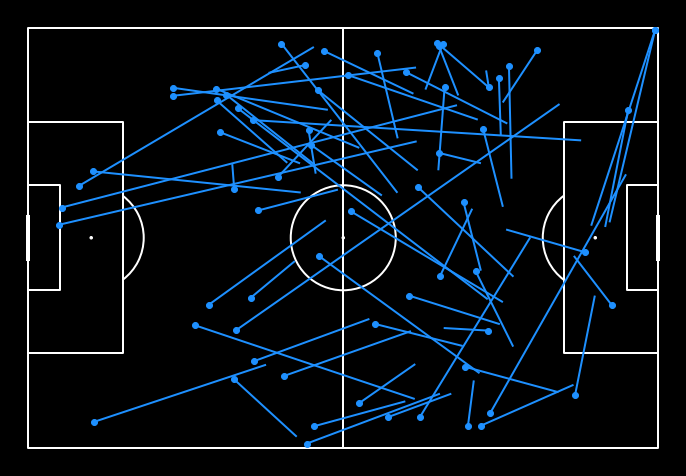

In [ ]:
from mplsoccer import Pitch
import mplsoccer
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(13,8.5))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='black', line_color='white',
              constrained_layout=False, tight_layout=True)

pitch.draw(ax=ax)
plt.gca().invert_yaxis()

for x in range(len(df_complete['x'])):
    if df['outcome'][x] == 1:
      plt.plot((df_complete['x'][x],df_complete['endx'][x]),(df_complete['y'][x],df_complete['endy'][x]),color='dodgerblue',linewidth=2)
      plt.scatter(df_complete['x'][x],df_complete['y'][x],color='dodgerblue')



In [ ]:
pip install cmasher

     |████████████████████████████████| 366 kB 5.1 MB/s 
     |████████████████████████████████| 40 kB 3.4 MB/s 


In [ ]:
pip install colorspacious

In [ ]:
df_complete['x'] = df_complete['x']/1.2
df_complete['y'] = df_complete['y']/0.8
df_complete['endx'] = df_complete['endx']/1.2
df_complete['endy'] = df_complete['endy']/0.8

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import cmasher as cmr
from mplsoccer import VerticalPitch
from mplsoccer.statsbomb import read_event, EVENT_SLUG
from mplsoccer.utils import FontManager
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict

Text(0.5, 1.0, 'Jeremy Ebobisse Passes Received')

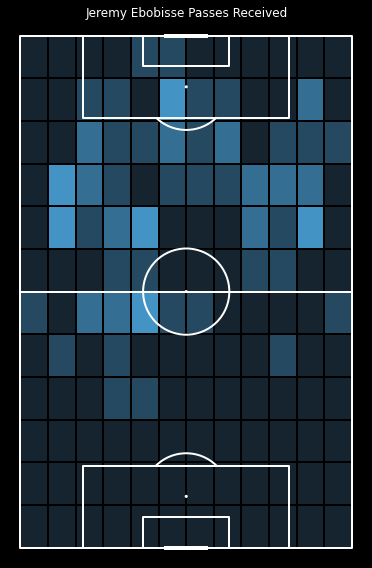

In [ ]:
pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)
flamingo_cmap = LinearSegmentedColormap.from_list("Flamingo - 10 colors",
                                                  ['#e3aca7', '#c03a1d'], N=10)
# same color maps but with 100 colors
pearl_earring_cmap_100 = LinearSegmentedColormap.from_list("Pearl Earring - 100 colors",
                                                           ['#15242e', '#4393c4'], N=100)
flamingo_cmap_100 = LinearSegmentedColormap.from_list("Flamingo - 100 colors",
                                                      ['#e3aca7', '#c03a1d'], N=100)

pitch = VerticalPitch(pitch_type='wyscout',line_color='w', line_zorder=2, pitch_color = 'black')
fig, ax = pitch.draw(figsize=(15, 8))
fig.set_facecolor('black')
plt.gca().invert_xaxis()
'''
kde = pitch.kdeplot(df.x, df.y, ax=ax,
                    # shade using 100 levels so it looks smooth
                    shade=True, levels=100,
                    # shade the lowest area so it looks smooth
                    # so even if there are no events it gets some color
                    shade_lowest=True,
                    cut=4,  # extended the cut so it reaches the bottom edge
                    cmap= 'magma')
'''
bs = pitch.bin_statistic(df_complete.endx, df_complete.endy, bins=(12,12))
heatmap = pitch.heatmap(bs,ax=ax,edgecolor ='black', linewidth = 1, cmap=pearl_earring_cmap_100)

plt.title('Jeremy Ebobisse Passes Received', color="white", size=12)

In [ ]:
import pandas_gbq

sql = """
with events as (select * from `san-jose-earthquakes-dev.robert_test.opta_events`),
 qualifiers as (select * from `san-jose-earthquakes-dev.robert_test.qualifiers`),
 second as (select opta_event_id,xG,startLoc_X,startLoc_Y,endLoc_X,endLoc_Y  from `san-jose-earthquakes-dev.robert_test.2021_2s_only`)

select
 *
from events join qualifiers
on events.opta_id = qualifiers.opta_id
join second on events.opta_id = second.opta_event_id
where playerName = 'C. Cowell'
limit 100
"""

print('Loading data (takes about 2-3 mins)...')
df = pandas_gbq.read_gbq(sql,project_id=project_id)

df.info()



Loading data (takes about 2-3 mins)...


GenericGBQException: ignored

In [ ]:
df

,gameId,contestantId,game_eventId,opta_id,playerId,opPlayerId,playerName,timeStamp,timeMin,periodId,typeId,outcome,x,y,gameId_1,contestantId_1,game_eventId_1,opta_id_1,playerId_1,opPlayerId_1,playerName_1,timeStamp_1,timeMin_1,periodId_1,typeId_1,outcome_1,x_1,y_1,qualifier_id,qualifier_type,value,opta_event_id,xG,startLoc_X,startLoc_Y,endLoc_X,endLoc_Y
0,f4422191-4d2f-4445-a60d-e3c7e92e52ce,a2jg79bf9ab1vj6iok2r328cc,881,2290918727,d4wt4sy8lg2h7cr3n6yl15vpx,170799,C. Espinoza,2021-04-24 21:48:49+00:00,95,2,1,1,33.0,96.2,f4422191-4d2f-4445-a60d-e3c7e92e52ce,a2jg79bf9ab1vj6iok2r328cc,881,2290918727,d4wt4sy8lg2h7cr3n6yl15vpx,170799,C. Espinoza,2021-04-24 21:48:49+00:00,95,2,1,1,33.0,96.2,2889255251,140,28.7,2290918727,NaN,NaN,NaN,NaN,NaN
1,f4422191-4d2f-4445-a60d-e3c7e92e52ce,a2jg79bf9ab1vj6iok2r328cc,881,2290918727,d4wt4sy8lg2h7cr3n6yl15vpx,170799,C. Espinoza,2021-04-24 21:48:49+00:00,95,2,1,1,33.0,96.2,f4422191-4d2f-4445-a60d-e3c7e92e52ce,a2jg79bf9ab1vj6iok2r328cc,881,2290918727,d4wt4sy8lg2h7cr3n6yl15vpx,170799,C. Espinoza,2021-04-24 21:48:49+00:00,95,2,1,1,33.0,96.2,2889255249,56,Back,2290918727,NaN,NaN,NaN,NaN,NaN
2,f4422191-4d2f-4445-a60d-e3c7e92e52ce,a2jg79bf9ab1vj6iok2r328cc,875,2290918515,d4wt4sy8lg2h7cr3n6yl15vpx,170799,C. Espinoza,2021-04-24 21:48:12+00:00,95,2,15,1,95.4,59.4,f4422191-4d2f-4445-a60d-e3c7e92e52ce,a2jg79bf9ab1vj6iok2r328cc,875,2290918515,d4wt4sy8lg2h7cr3n6yl15vpx,170799,C. Espinoza,2021-04-24 21:48:12+00:00,95,2,15,1,95.4,59.4,2889254089,56,Center,2290918515,0.2599,NaN,NaN,NaN,NaN
3,f4422191-4d2f-4445-a60d-e3c7e92e52ce,a2jg79bf9ab1vj6iok2r328cc,875,2290918515,d4wt4sy8lg2h7cr3n6yl15vpx,170799,C. Espinoza,2021-04-24 21:48:12+00:00,95,2,15,1,95.4,59.4,f4422191-4d2f-4445-a60d-e3c7e92e52ce,a2jg79bf9ab1vj6iok2r328cc,875,2290918515,d4wt4sy8lg2h7cr3n6yl15vpx,170799,C. Espinoza,2021-04-24 21:48:12+00:00,95,2,15,1,95.4,59.4,2889256387,103,3.2,2290918515,0.2599,NaN,NaN,NaN,NaN
4,f4422191-4d2f-4445-a60d-e3c7e92e52ce,a2jg79bf9ab1vj6iok2r328cc,875,2290918515,d4wt4sy8lg2h7cr3n6yl15vpx,170799,C. Espinoza,2021-04-24 21:48:12+00:00,95,2,15,1,95.4,59.4,f4422191-4d2f-4445-a60d-e3c7e92e52ce,a2jg79bf9ab1vj6iok2r328cc,875,2290918515,d4wt4sy8lg2h7cr3n6yl15vpx,170799,C. Espinoza,2021-04-24 21:48:12+00:00,95,2,15,1,95.4,59.4,2889256377,76,None,2290918515,0.2599,NaN,NaN,NaN,NaN
5,f4422191-4d2f-4445-a60d-e3c7e92e52ce,a2jg79bf9ab1vj6iok2r328cc,875,2290918515,d4wt4sy8lg2h7cr3n6yl15vpx,170799,C. Espinoza,2021-04-24 21:48:12+00:00,95,2,15,1,95.4,59.4,f4422191-4d2f-4445-a60d-e3c7e92e52ce,a2jg79bf9ab1vj6iok2r328cc,875,2290918515,d4wt4sy8lg2h7cr3n6yl15vpx,170799,C. Espinoza,2021-04-24 21:48:12+00:00,95,2,15,1,95.4,59.4,2889254087,61,None,2290918515,0.2599,NaN,NaN,NaN,NaN
6,f4422191-4d2f-4445-a60d-e3c7e92e52ce,a2jg79bf9ab1vj6iok2r328cc,875,2290918515,d4wt4sy8lg2h7cr3n6yl15vpx,170799,C. Espinoza,2021-04-24 21:48:12+00:00,95,2,15,1,95.4,59.4,f4422191-4d2f-4445-a60d-e3c7e92e52ce,a2jg79bf9ab1vj6iok2r328cc,875,2290918515,d4wt4sy8lg2h7cr3n6yl15vpx,170799,C. Espinoza,2021-04-24 21:48:12+00:00,95,2,15,1,95.4,59.4,2889257105,23,None,2290918515,0.2599,NaN,NaN,NaN,NaN
7,f4422191-4d2f-4445-a60d-e3c7e92e52ce,a2jg79bf9ab1vj6iok2r328cc,875,2290918515,d4wt4sy8lg2h7cr3n6yl15vpx,170799,C. Espinoza,2021-04-24 21:48:12+00:00,95,2,15,1,95.4,59.4,f4422191-4d2f-4445-a60d-e3c7e92e52ce,a2jg79bf9ab1vj6iok2r328cc,875,2290918515,d4wt4sy8lg2h7cr3n6yl15vpx,170799,C. Espinoza,2021-04-24 21:48:12+00:00,95,2,15,1,95.4,59.4,2889259321,154,None,2290918515,0.2599,NaN,NaN,NaN,NaN
8,f4422191-4d2f-4445-a60d-e3c7e92e52ce,a2jg79bf9ab1vj6iok2r328cc,875,2290918515,d4wt4sy8lg2h7cr3n6yl15vpx,170799,C. Espinoza,2021-04-24 21:48:12+00:00,95,2,15,1,95.4,59.4,f4422191-4d2f-4445-a60d-e3c7e92e52ce,a2jg79bf9ab1vj6iok2r328cc,875,2290918515,d4wt4sy8lg2h7cr3n6yl15vpx,170799,C. Espinoza,2021-04-24 21:48:12+00:00,95,2,15,1,95.4,59.4,2889256379,29,None,2290918515,0.2599,NaN,NaN,NaN,NaN
9,f4422191-4d2f-4445-a60d-e3c7e92e52ce,a2jg79bf9ab1vj6iok2r328cc,881,2290918727,d4wt4sy8lg2h7cr3n6yl15vpx,170799,

In [ ]:
import pandas_gbq

sql = """
with events as (select * from `san-jose-earthquakes-dev.robert_test.opta_events`),
 qualifiers as (select * from `san-jose-earthquakes-dev.robert_test.qualifiers`),
 second as (select opta_event_id,xG from `san-jose-earthquakes-dev.robert_test.2021_2s_only`)

select
 *, second.xG
from events join qualifiers
on events.opta_id = qualifiers.opta_id
join second on events.opta_id = second.opta_event_id
where second.xG >0 and events.playerName = "J. Ebobisse"
limit 100
"""
print('Loading data (takes about 2-3 mins)...')
df = pandas_gbq.read_gbq(sql,project_id=project_id)

df.info()


Loading data (takes about 2-3 mins)...


GenericGBQException: ignored

In [ ]:
df.head()

,gameId,contestantId,game_eventId,opta_id,playerId,opPlayerId,playerName,timeStamp,timeMin,periodId,typeId,outcome,x,y,gameId_1,contestantId_1,game_eventId_1,opta_id_1,playerId_1,opPlayerId_1,playerName_1,timeStamp_1,timeMin_1,periodId_1,typeId_1,outcome_1,x_1,y_1,qualifier_id,qualifier_type,value,opta_event_id,xG,xG_1
0,3dcf4f14-1cd4-4d84-acd5-19cb7979e534,a2jg79bf9ab1vj6iok2r328cc,106,2299469123,5vjalgmy5e9xhfdjoeq6kxqwa,467478,C. Cowell,2021-05-16 02:16:43+00:00,7,1,15,1,89.2,43.7,3dcf4f14-1cd4-4d84-acd5-19cb7979e534,a2jg79bf9ab1vj6iok2r328cc,106,2299469123,5vjalgmy5e9xhfdjoeq6kxqwa,467478,C. Cowell,2021-05-16 02:16:43+00:00,7,1,15,1,89.2,43.7,2934959547,231,48.4,2299469123,0.1551,0.1551
1,3dcf4f14-1cd4-4d84-acd5-19cb7979e534,a2jg79bf9ab1vj6iok2r328cc,106,2299469123,5vjalgmy5e9xhfdjoeq6kxqwa,467478,C. Cowell,2021-05-16 02:16:43+00:00,7,1,15,1,89.2,43.7,3dcf4f14-1cd4-4d84-acd5-19cb7979e534,a2jg79bf9ab1vj6iok2r328cc,106,2299469123,5vjalgmy5e9xhfdjoeq6kxqwa,467478,C. Cowell,2021-05-16 02:16:43+00:00,7,1,15,1,89.2,43.7,2934364027,103,19,2299469123,0.1551,0.1551
2,3dcf4f14-1cd4-4d84-acd5-19cb7979e534,a2jg79bf9ab1vj6iok2r328cc,106,2299469123,5vjalgmy5e9xhfdjoeq6kxqwa,467478,C. Cowell,2021-05-16 02:16:43+00:00,7,1,15,1,89.2,43.7,3dcf4f14-1cd4-4d84-acd5-19cb7979e534,a2jg79bf9ab1vj6iok2r328cc,106,2299469123,5vjalgmy5e9xhfdjoeq6kxqwa,467478,C. Cowell,2021-05-16 02:16:43+00:00,7,1,15,1,89.2,43.7,2934959545,230,99.0,2299469123,0.1551,0.1551
3,3dcf4f14-1cd4-4d84-acd5-19cb7979e534,a2jg79bf9ab1vj6iok2r328cc,106,2299469123,5vjalgmy5e9xhfdjoeq6kxqwa,467478,C. Cowell,2021-05-16 02:16:43+00:00,7,1,15,1,89.2,43.7,3dcf4f14-1cd4-4d84-acd5-19cb7979e534,a2jg79bf9ab1vj6iok2r328cc,106,2299469123,5vjalgmy5e9xhfdjoeq6kxqwa,467478,C. Cowell,2021-05-16 02:16:43+00:00,7,1,15,1,89.2,43.7,2934363417,20,None,2299469123,0.1551,0.1551
4,3dcf4f14-1cd4-4d84-acd5-19cb7979e534,a2jg79bf9ab1vj6iok2r328cc,106,2299469123,5vjalgmy5e9xhfdjoeq6kxqwa,467478,C. Cowell,2021-05-16 02:16:43+00:00,7,1,15,1,89.2,43.7,3dcf4f14-1cd4-4d84-acd5-19cb7979e534,a2jg79bf9ab1vj6iok2r328cc,106,2299469123,5vjalgmy5e9xhfdjoeq6kxqwa,467478,C. Cowell,2021-05-16 02:16:43+00:00,7,1,15,1,89.2,43.7,2934364021,55,105,2299469123,0.1551,0.1551


In [ ]:
import pandas_gbq

project_id = 'san-jose-earthquakes-dev'
bigQueryDB = 'san-jose-earthquakes-dev.robert_test'


## change limit and where clause for full data set
sql = """
with opta as
( select *  from `san-jose-earthquakes-dev.robert_test.opta_events`
) , second as (
    select * from `san-jose-earthquakes-dev.robert_test.second_spectrum`
)

select *
from opta left join second on opta.opta_id = second.opta_event_id
where playerName = 'M. Toye' and xG > 0
limit 100
"""
print('Loading data (takes about 2-3 mins)...')
df = pandas_gbq.read_gbq(sql,project_id=project_id)

df.info()

## High pressure teams- LAFC (11690), NYRB (399), SKC (421), MinnUTD (6977), TOR (2077), PHIlA (5513), DC (1326), CF (1207), MONTREAL (1616), NE (928), NYCFC (9668), NASH (15154), SEA (3500)
## Low Pressure Teams- AUSTIN (15296), COLO (436), PORT (1581), ORL (6900), HOU (1897), VAN (399), CINCI (11504), ATL (11091), DALLAS (1903), LAG (1230), COL (454), MIAMI (14880), RSL (1899), SJ (1131)

## TypeId's - 16=Goal, 15=Blocked/Saved Shot, 13=Missed Shot, 1= Pass (Outcome), 4= foul, 61= touch

## Matches- 893b03cc-1c6e-4899-93af-21fccb22bbb3 = Houston,

Loading data (takes about 2-3 mins)...
Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=BeFiGSNgmHVCb9DrUDcNAccLP7M3bk&prompt=consent&access_type=offline
Enter the authorization code: 4/1AX4XfWg47fKS4Mf7pLbC9u2X8K9uW-KdoxWF6VF3K0hMSI3G2pX43jyqHj8


GenericGBQException: ignored

In [ ]:
df = df[df['x']>'85']

In [ ]:
df = df[df['y']<'79.5']

In [ ]:
df = df[df['y']>'20.5']

In [ ]:
df

,gameId,contestantId,game_eventId,opta_id,playerId,opPlayerId,playerName,timeStamp,timeMin,periodId,typeId,outcome,x,y,marking_id,opta_event_id,opta_game_id,markingType,gameClock,wallClock,frameIdx,attTeamId,defTeamId,possesion_events,isContested,teamXg,startType,verticalPassing,verticalCarrying,playerId_1,passerDefId,passerDefDist,receiverId,vel_mps,vel_degrees,passLoc_X,passLoc_Y,defBehindPasser,defBehindReceiver,attAheadPasser,attAheadReceiver,defBypassed,defInBox,attInBox,passProbability,passerVel_mps,passerVel_degrees,air,breaksOffsideLine,receptionId,carryId,shotLoc_X,shotLoc_Y,goalDist,shooterDefId,shooterDefDist,numDefGoalside,xG,keeperInitialDist,gkVel_mps,gkVel_degrees,gkLoc_X,gkLoc_Y,defInGkBox,attInGkBox,shortOption,nearPostDefender,farPostDefender,crossSwing,isInterception,receptionLoc_X,receptionLoc_Y,receptionVel_mps,receptionVel_degrees,passId,startLoc_X,startLoc_Y,endLoc_X,endLoc_Y,distance
0,1d737657-eb96-4cbe-8391-0143b5ede130,oisd4xgg4qxt18c7tikdejbe,421,2287578911,ao4mmwhqc99m6fq3b23lmau3t,249164,M. Toye,2021-04-17 18:57:30+00:00,47,1,3,0,43.2,96.6,None,None,None,None,NaN,NaT,NaN,None,None,None,None,NaN,None,NaN,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,None,None,None,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
1,3f3f640f-e846-4834-ba76-f182396bcfa2,oisd4xgg4qxt18c7tikdejbe,265,2290802445,ao4mmwhqc99m6fq3b23lmau3t,249164,M. Toye,2021-04-24 18:35:58+00:00,27,1,3,0,36.0,84.2,None,None,None,None,NaN,NaT,NaN,None,None,None,None,NaN,None,NaN,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,None,None,None,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['outcome'].value_counts(normalize=True)

1    1.0
Name: outcome, dtype: float64

In [ ]:
#Aerial duel win rate KPI- Nathan (71.42%), Jungwirth (60%), Beason (56.25%), Alanis (50%)
#Aerial duel win rate inside penalty box- Jungwirth (50%), Beason (N/A), Nathan (N/A), Alanis (N/A)

In [ ]:
##Mason Toye KPIs Aerial Duel Rate in penalty area- 50%, Aerial duel win rate- 40%